# Getting Started

@@@ note

If you are new to Earth-observing imagery, you might consider looking at the @ref:[Concepts](concepts.md) section first.

@@@

RasterFrames® is a geospatial raster processing library for @ref:[Python, Scala and SQL](languages.md), available through @ref:[several mechanisms](#other-options).

The simplest way to get started with RasterFrames is via the [Docker image](#using-jupyter-notebook), or from the Python shell.  To get started with the Python shell you will need:

1. [Python](https://www.python.org/) installed. Version 3.6 or greater is recommended.
1. [`pip`](https://pip.pypa.io/en/stable/installing/) installed. If you are using Python 3, `pip` may already be installed.
1. Java [JDK 8](https://openjdk.java.net/install/index.html) installed on your system and `java` on your system `PATH` or `JAVA_HOME` pointing to a Java installation.

## pip install pyrasterframes

```bash
$ python3 -m pip install pyrasterframes
```

Then in a python interpreter of your choice, you can get a [`pyspark` `SparkSession`](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.SparkSession) using the [`local[*]` master](https://spark.apache.org/docs/latest/submitting-applications.html#master-urls).




In [1]:
from pyrasterframes import rf_ipython

In [2]:
import pyrasterframes
from pyrasterframes.utils import create_rf_spark_session
spark = create_rf_spark_session()


Then, you can read a raster and work with it in a Spark DataFrame.



rf_crs(added),rf_extent(added),rf_tile(added)
[+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs ],"[-7783653.637667, 993342.4642358534, -7665045.582235853, 1111950.519667]",
[+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs ],"[-7665045.582235853, 993342.4642358534, -7546437.526804706, 1111950.519667]",
[+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs ],"[-7546437.526804707, 993342.4642358534, -7427829.47137356, 1111950.519667]",
[+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs ],"[-7427829.47137356, 993342.4642358534, -7309221.415942413, 1111950.519667]",
[+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs ],"[-7309221.415942414, 993342.4642358534, -7190613.360511267, 1111950.519667]",

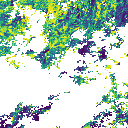
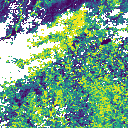
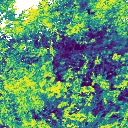
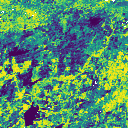
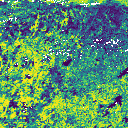

In [3]:
from pyrasterframes.rasterfunctions import *
from pyspark.sql.functions import lit

# Read a MODIS surface reflectance granule
df = spark.read.raster('https://modis-pds.s3.amazonaws.com/MCD43A4.006/11/08/2019059/MCD43A4.A2019059.h11v08.006.2019072203257_B02.TIF')

# Add 3 element-wise, show some rows of the DataFrame
sample = df.withColumn('added', rf_local_add(df.proj_raster, lit(3))) \
  .select(rf_crs('added'), rf_extent('added'), rf_tile('added'))
sample


This example is extended in the [getting started Jupyter notebook](https://nbviewer.jupyter.org/github/locationtech/rasterframes/blob/develop/rf-notebook/src/main/notebooks/Getting%20Started.ipynb).

## Next Steps

To understand more about how and why RasterFrames represents Earth observation in DataFrames, read about the @ref:[core concepts](concepts.md) and the project @ref:[description](description.md). For more hands-on examples, see the chapters about @ref:[reading](raster-io.md) and @ref:[processing](raster-processing.md) with RasterFrames.

## Other Options

You can also use RasterFrames in the following environments:

1. Jupyter Notebook
1. `pyspark` shell

### Using Jupyter Notebook

 RasterFrames provides a Docker image for a Jupyter notebook server whose default kernel is already set up for running RasterFrames. To use it:

 1. Install [Docker](https://docs.docker.com/install/)
 1. Pull the image: `docker pull s22s/rasterframes-notebook`
 1. Run a container with the image, for example:
      `docker run -p 8808:8888 -p 44040:4040 -v /path/to/notebooks:/home/jovyan/work rasterframes-notebook:latest`
 1. In a browser, open `localhost:8808` in the example above.

See the [RasterFrames Notebook README](https://github.com/locationtech/rasterframes/blob/develop/rf-notebook/README.md) for instructions on building the Docker image for this Jupyter notebook server.

### Using `pyspark` shell

You can use RasterFrames in a `pyspark` shell. To set up the `pyspark` environment, prepare your call with the appropriate `--master` and other `--conf` arguments for your cluster manager and environment. For RasterFrames support you need to pass arguments pointing to the various Java dependencies. You will also need the Python source zip, even if you have pip installed the package. You can download the source zip here: https://repo1.maven.org/maven2/org/locationtech/rasterframes/pyrasterframes_2.11/${VERSION}/pyrasterframes_2.11-${VERSION}-python.zip.

The `pyspark` shell command will look something like this.

```bash
   pyspark \
    --master local[*] \
    --py-files pyrasterframes_2.11-${VERSION}-python.zip \
    --packages org.locationtech.rasterframes:rasterframes_2.11:${VERSION},org.locationtech.rasterframes:pyrasterframes_2.11:${VERSION},org.locationtech.rasterframes:rasterframes-datasource_2.11:${VERSION} \
    --conf spark.serializer=org.apache.spark.serializer.KryoSerializer \ # these configs improve serialization performance
    --conf spark.kryo.registrator=org.locationtech.rasterframes.util.RFKryoRegistrator \
    --conf spark.kryoserializer.buffer.max=500m
```

Then in the `pyspark` shell, import the module and call `withRasterFrames` on the SparkSession.



In [4]:
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.2
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 15:43:19)
SparkSession available as 'spark'.
>>> import pyrasterframes
>>> spark = spark.withRasterFrames()
>>> df = spark.read.raster('https://landsat-pds.s3.amazonaws.com/c1/L8/158/072/LC08_L1TP_158072_20180515_20180604_01_T1/LC08_L1TP_158072_20180515_20180604_01_T1_B5.TIF')


Now you have the configured SparkSession with RasterFrames enabled.

### Scala Development

There is first-class support for Scala in RasterFrames. See the @ref:[Scala and SQL](languages.md) page for an example application, and the [Scala API Documentation](latest/api/index.html) for function details.

If you would like to use RasterFrames in Scala, you'll need to add the following resolvers and dependencies to your sbt project:

```scala
resolvers ++= Seq(
      "Azavea Public Builds" at "https://dl.bintray.com/azavea/geotrellis",
      "locationtech-releases" at "https://repo.locationtech.org/content/groups/releases"
)
libraryDependencies ++= Seq(
    "org.locationtech.rasterframes" %% "rasterframes" % ${VERSION},
    "org.locationtech.rasterframes" %% "rasterframes-datasource" % ${VERSION},
    // This is optional. Provides access to AWS PDS catalogs.
    "org.locationtech.rasterframes" %% "rasterframes-experimental" % ${VERSION}
)
``` 

RasterFrames is compatible with Spark 2.4.x.

## Installing GDAL Support

GDAL provides a wide variety of drivers to read data from many different raster formats. If GDAL is installed in the environment, RasterFrames will be able to @ref:[read](raster-read.md) those formats.  If you are using the @ref:[Jupyter Notebook image](getting-started.md#jupyter-notebook), GDAL is already installed for you. Otherwise follow the instructions below. Version 2.4.1 or greater is required.

### Installing on MacOS

Using [homebrew](https://brew.sh/):

```bash
brew install gdal
```

### Installing on Linux

Using [`apt-get`](https://wiki.debian.org/Apt):

```bash
sudo apt-get update
sudo apt-get install gdal-bin
```

### Testing For GDAL

```bash
gdalinfo --formats
```

To support GeoTIFF and JPEG2000 formats, you should look for the following drivers from the output above:

* `GTiff -raster- (rw+vs): GeoTIFF`
* `JPEG2000 -raster,vector- (rwv): JPEG-2000 part 1 (ISO/IEC 15444-1), based on Jasper library`

Do the following to see if RasterFrames was able to find GDAL:



In [5]:
from pyrasterframes.utils import gdal_version
print(gdal_version())


This will print out something like "GDAL x.y.z, released 20yy/mm/dd". If it reports "not available", then GDAL is not installed in a place where the RasterFrames runtime was able to find it. Please [file an issue](https://github.com/locationtech/rasterframes/issues) to get help resolving this problem.
